In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 2s 0us/step


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

In [5]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [17]:
import numpy as np

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j]=1.
    return results



In [15]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [31]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [29]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [30]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

In [43]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [44]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train=y_train[10000:]

In [46]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 8s 223ms/step - loss: 0.4771 - accuracy: 0.7974 - val_loss: 0.3392 - val_accuracy: 0.8777
Epoch 2/20
30/30 [==============================] - 3s 100ms/step - loss: 0.2699 - accuracy: 0.9051 - val_loss: 0.2921 - val_accuracy: 0.8840
Epoch 3/20
30/30 [==============================] - 2s 78ms/step - loss: 0.1949 - accuracy: 0.9319 - val_loss: 0.3125 - val_accuracy: 0.8748
Epoch 4/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1466 - accuracy: 0.9503 - val_loss: 0.3808 - val_accuracy: 0.8561
Epoch 5/20
30/30 [==============================] - 3s 111ms/step - loss: 0.1229 - accuracy: 0.9577 - val_loss: 0.3205 - val_accuracy: 0.8779
Epoch 6/20
30/30 [==============================] - 2s 75ms/step - loss: 0.0983 - accuracy: 0.9661 - val_loss: 0.3200 - val_accuracy: 0.8819
Epoch 7/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0740 - accuracy: 0.9769 - val_loss: 0.3538 - val_accuracy: 0.8781
Epoch 8/20

In [47]:
history_dict = history.history

In [48]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

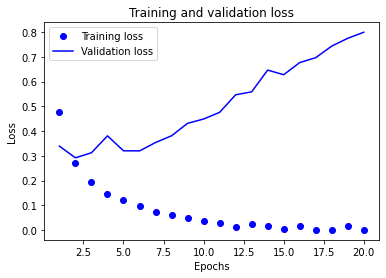

In [49]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")        
plt.plot(epochs, val_loss_values, "b", label="Validation loss")   
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

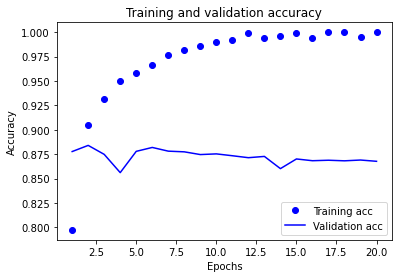

In [50]:
plt.clf()                           
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.8766 - accuracy: 0.8506


In [52]:
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 5s 173ms/step - loss: 7.0817e-04 - accuracy: 1.0000 - val_loss: 0.8516 - val_accuracy: 0.8668
Epoch 2/4
30/30 [==============================] - 2s 77ms/step - loss: 0.0135 - accuracy: 0.9965 - val_loss: 0.8893 - val_accuracy: 0.8671
Epoch 3/4
30/30 [==============================] - 3s 105ms/step - loss: 3.7191e-04 - accuracy: 1.0000 - val_loss: 0.9089 - val_accuracy: 0.8664
Epoch 4/4
30/30 [==============================] - 2s 77ms/step - loss: 2.9950e-04 - accuracy: 1.0000 - val_loss: 0.9383 - val_accuracy: 0.8659


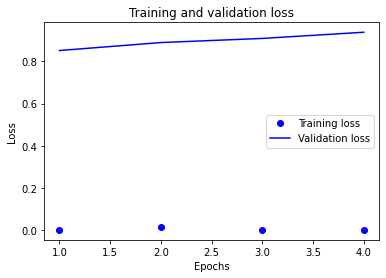

In [53]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")        
plt.plot(epochs, val_loss_values, "b", label="Validation loss")   
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

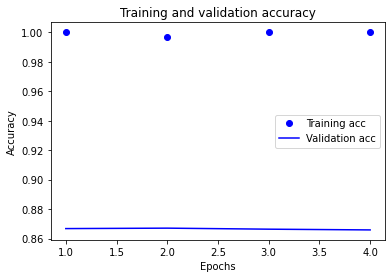

In [54]:
plt.clf()                           
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [55]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 6s 7ms/step - loss: 1.0329 - accuracy: 0.8489


### Reuters Dataset

In [14]:
from tensorflow.keras.datasets import reuters 
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [15]:
len(train_data), len(test_data), len(train_labels)

(8982, 2246, 8982)

In [61]:
train_labels[0]

3

In [18]:
x_train = vectorize_sequences(train_data)      
x_test = vectorize_sequences(test_data)    

In [63]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [8]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [11]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [12]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 4s 144ms/step - loss: 2.5879 - accuracy: 0.5291 - val_loss: 1.7057 - val_accuracy: 0.6560
Epoch 2/20
16/16 [==============================] - 1s 69ms/step - loss: 1.3919 - accuracy: 0.7080 - val_loss: 1.2867 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 1s 68ms/step - loss: 1.0463 - accuracy: 0.7765 - val_loss: 1.1202 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 1s 67ms/step - loss: 0.8316 - accuracy: 0.8183 - val_loss: 1.0265 - val_accuracy: 0.7860
Epoch 5/20
16/16 [==============================] - 1s 91ms/step - loss: 0.6705 - accuracy: 0.8583 - val_loss: 0.9676 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 77ms/step - loss: 0.5383 - accuracy: 0.8867 - val_loss: 0.9210 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 72ms/step - loss: 0.4301 - accuracy: 0.9112 - val_loss: 0.9233 - val_accuracy: 0.8080
Epoch 8/20
1

In [24]:
import matplotlib.pyplot as plt

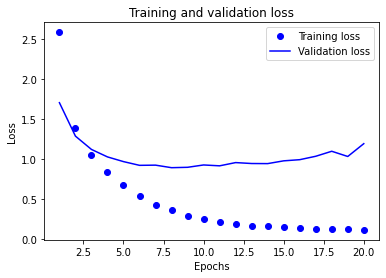

In [25]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

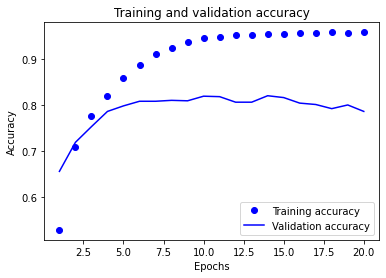

In [27]:
plt.clf()                          
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 5ms/step - loss: 1.3731 - accuracy: 0.7663


In [35]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

In [36]:
train_data.shape, train_targets.shape


((404, 13), (404,))

In [37]:
test_data.shape

(102, 13)

In [38]:
mean = train_data.mean(axis=0)
train_data-=mean
std = train_data.std(axis=0)
train_data /=std
test_data-=mean
test_data/=std

In [39]:
8//2

4

In [40]:
for i in range(4):
    print (i)

0
1
2
3
